In [10]:
import pandas as pd
import numpy as np
import datetime as dt
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [11]:
Raw = pd.read_csv("E:/Importance/FT_Project/LoanStats_2017Q3.csv",sep=',')
Raw.shape

(122701, 141)

In [12]:
Metrics = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment', 'grade', 'sub_grade','emp_length',\
           'home_ownership','annual_inc','verification_status','loan_status','purpose','title','addr_state','dti','total_rec_int']
Loan = Raw[Metrics].copy()
Loan['int_rate'] = list(map(lambda x: float(x[:-1])/100,Loan.int_rate))
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122701 entries, 0 to 122700
Data columns (total 18 columns):
loan_amnt              122701 non-null int64
funded_amnt            122701 non-null int64
funded_amnt_inv        122701 non-null int64
term                   122701 non-null object
int_rate               122701 non-null float64
installment            122701 non-null float64
grade                  122701 non-null object
sub_grade              122701 non-null object
emp_length             122701 non-null object
home_ownership         122701 non-null object
annual_inc             122701 non-null float64
verification_status    122701 non-null object
loan_status            122701 non-null object
purpose                122701 non-null object
title                  122701 non-null object
addr_state             122701 non-null object
dti                    122517 non-null float64
total_rec_int          122701 non-null float64
dtypes: float64(5), int64(3), object(10)
memory usage: 16.9

In [13]:
state= Loan.groupby('addr_state').agg({'loan_amnt':'sum','funded_amnt':'count'}).reset_index().sort_values('loan_amnt',ascending=False)
total = state.loan_amnt.sum()
state.columns=['state','total_users','total_amnt']
state['loan_pct'] = state.total_amnt*1.0/total
state['amnt_P_user'] = state.total_amnt/state.total_users
state.head()

,state,total_users,total_amnt,loan_pct,amnt_P_user
4,CA,16373,244755325,0.136643,14948.715874
42,TX,10256,155020425,0.086546,15115.096041
33,NY,10688,154257525,0.086120,14432.777414
9,FL,8622,121278925,0.067708,14066.217235
13,IL,5161,79000475,0.044105,15307.203061


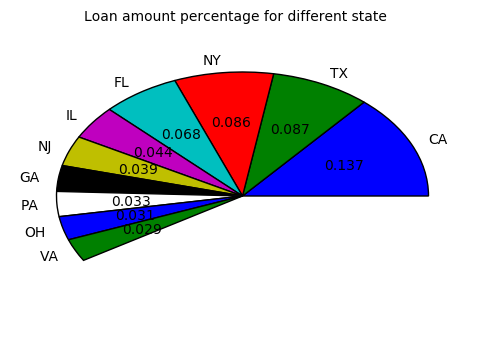

In [14]:
def get_value(val):
    return round(val/100,3)
state.loc[state.loan_pct<0.02,'state'] = 'other'
state2 = state.groupby('state')['loan_pct'].sum().reset_index()
plt.pie(state.loan_pct.head(10),labels=state.state.head(10),autopct=get_value)
plt.suptitle('Loan amount percentage for different state')

In [15]:
def get_graph(metric):
    Loan.groupby(metric)['int_rate'].mean().plot(kind='bar')
    plt.xticks(rotation='horizontal')
Loan.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,addr_state,dti,total_rec_int
0,33000,33000,33000,36 months,0.0721,1022.12,A,A3,< 1 year,MORTGAGE,107000.0,Verified,Current,debt_consolidation,Debt consolidation,TX,19.06,915.14
1,40000,40000,40000,60 months,0.1505,952.65,C,C4,9 years,MORTGAGE,120000.0,Verified,Current,debt_consolidation,Debt consolidation,TX,31.11,2384.17
2,12000,12000,12000,36 months,0.0797,375.88,A,A5,10+ years,OWN,42000.0,Source Verified,Current,debt_consolidation,Debt consolidation,CA,27.74,386.66


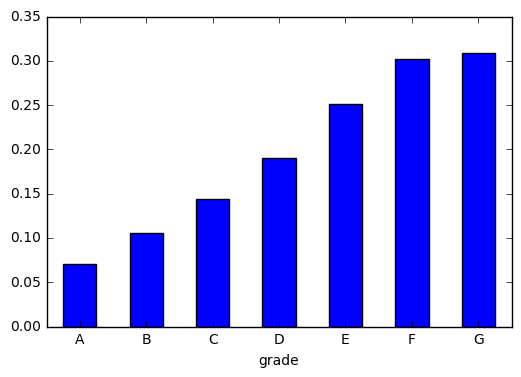

In [17]:
get_graph('grade')

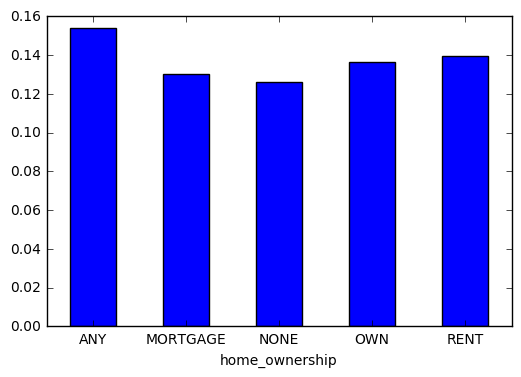

In [16]:
get_graph('home_ownership')

In [18]:
Loan2 = Loan[(Loan.grade == 'A') & (Loan.term == ' 36 months')].copy().reset_index(drop=True)
print Loan2.groupby('addr_state')['dti'].mean().sort_values(ascending=False).head(5)
print Loan2.groupby('addr_state')['dti'].mean().sort_values().head(5)

addr_state
ND    24.518780
OK    24.207101
UT    22.450874
SD    21.120909
WY    20.374103
Name: dti, dtype: float64
addr_state
DC    13.183167
NY    15.028636
CA    15.415889
RI    15.530444
MA    15.545396
Name: dti, dtype: float64
